In [3]:
import mysql.connector

# Database configuration
DATABASE_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'SnehaJoshi92$',  # Your MySQL password
    'database': 'UserRetentionDB'  # Ensure this database exists
}

try:
    # Establish database connection
    db = mysql.connector.connect(
        host=DATABASE_CONFIG['host'],
        user=DATABASE_CONFIG['user'],
        password=DATABASE_CONFIG['password'],
        database=DATABASE_CONFIG['database']
    )
    cursor = db.cursor(dictionary=True)
    print("Database connection established")

    # Example query to check tables
    cursor.execute("SHOW TABLES;")
    tables = cursor.fetchall()
    print("Tables in the database:", tables)

except mysql.connector.Error as err:
    print(f"Error: {err}")

Database connection established
Tables in the database: [{'Tables_in_userretentiondb': 'AnonymousActivity'}, {'Tables_in_userretentiondb': 'Conversions'}, {'Tables_in_userretentiondb': 'UserLogins'}]


In [6]:
def log_anonymous_activity(content_id, session_id):
    query = """
        INSERT INTO AnonymousActivity (content_id, session_id)
        VALUES (%s, %s)
    """
    cursor.execute(query, (content_id, session_id))
    db.commit()
    print("Anonymous activity logged")

def log_conversion(session_id, user_id):
    query = """
        INSERT INTO Conversions (session_id, user_id)
        VALUES (%s, %s)
    """
    cursor.execute(query, (session_id, user_id))
    db.commit()
    print("Conversion logged")

def log_user_login(user_id):
    query = """
        INSERT INTO UserLogins (user_id)
        VALUES (%s)
    """
    cursor.execute(query, (user_id,))
    db.commit()
    print("User login logged")


In [7]:
log_anonymous_activity(content_id=101, session_id='test_session_1')


Anonymous activity logged


In [8]:
log_conversion(session_id='test_session_1', user_id=1)


Conversion logged


In [9]:
log_user_login(user_id=1)


User login logged


In [10]:
def get_total_anonymous_activity():
    query = "SELECT COUNT(*) AS TotalAnonymousActivity FROM AnonymousActivity;"
    cursor.execute(query)
    result = cursor.fetchone()
    return result['TotalAnonymousActivity']


In [11]:
def get_conversion_rate():
    query = """
        SELECT 
            (SELECT COUNT(*) FROM Conversions) / (SELECT COUNT(*) FROM AnonymousActivity) * 100 AS ConversionRate;
    """
    cursor.execute(query)
    result = cursor.fetchone()
    return result['ConversionRate']


In [12]:
def get_inactive_users(interval='1 DAY'):
    query = f"""
        SELECT user_id, MAX(login_at) AS LastLogin
        FROM UserLogins
        GROUP BY user_id
        HAVING LastLogin < NOW() - INTERVAL {interval};
    """
    cursor.execute(query)
    results = cursor.fetchall()
    return results


In [15]:
query = "SELECT COUNT(*) AS TotalAnonymousActivity FROM AnonymousActivity;"
cursor.execute(query)
print(cursor.fetchone())

{'TotalAnonymousActivity': 7}


In [16]:
query = "SELECT COUNT(*) AS TotalAnonymousActivity FROM AnonymousActivity;"
cursor.execute(query)
print(cursor.fetchone())


{'TotalAnonymousActivity': 7}


In [17]:
query = """
    SELECT 
        (SELECT COUNT(*) FROM Conversions) / (SELECT COUNT(*) FROM AnonymousActivity) * 100 AS ConversionRate;
"""
cursor.execute(query)
print(cursor.fetchone())


{'ConversionRate': Decimal('100.0000')}


In [18]:
query = """
    SELECT user_id, MAX(login_at) AS LastLogin 
    FROM UserLogins 
    GROUP BY user_id 
    HAVING LastLogin < NOW() - INTERVAL 1 DAY;
"""
cursor.execute(query)
for row in cursor.fetchall():
    print(row)


{'user_id': 4, 'LastLogin': datetime.datetime(2024, 12, 13, 15, 45)}
{'user_id': 5, 'LastLogin': datetime.datetime(2024, 12, 10, 10, 15)}


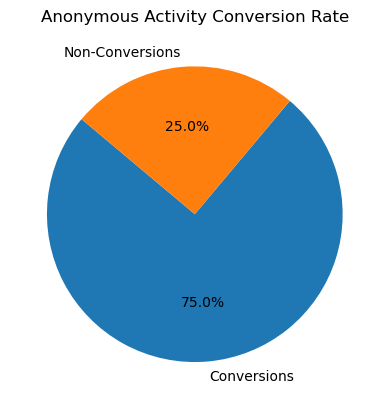

In [19]:
import matplotlib.pyplot as plt

# Example: Pie Chart for Conversion vs Anonymous Activity
anonymous_activity = get_total_anonymous_activity()
conversions = anonymous_activity * (get_conversion_rate() / 100)
non_conversions = anonymous_activity - conversions

labels = ['Conversions', 'Non-Conversions']
sizes = [conversions, non_conversions]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Anonymous Activity Conversion Rate")
plt.show()
